<a href="https://colab.research.google.com/github/Ellen-code-dev/AI-tools/blob/main/Part2_Task1_ScikitLearn_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load and explore the dataset

from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Create a DataFrame for better visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check dataset shape
print("\nDataset shape:", df.shape)


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Dataset shape: (150, 5)


In [2]:
# Step 2: Preprocessing and Encoding

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Encode labels if necessary (Iris target is already numeric, but we show it as example)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Confirm dataset sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (120, 4)
Testing set size: (30, 4)


In [3]:
# Step 3: Train the Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"✅ Model Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}\n")

# Show detailed classification report
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred))


✅ Model Evaluation Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



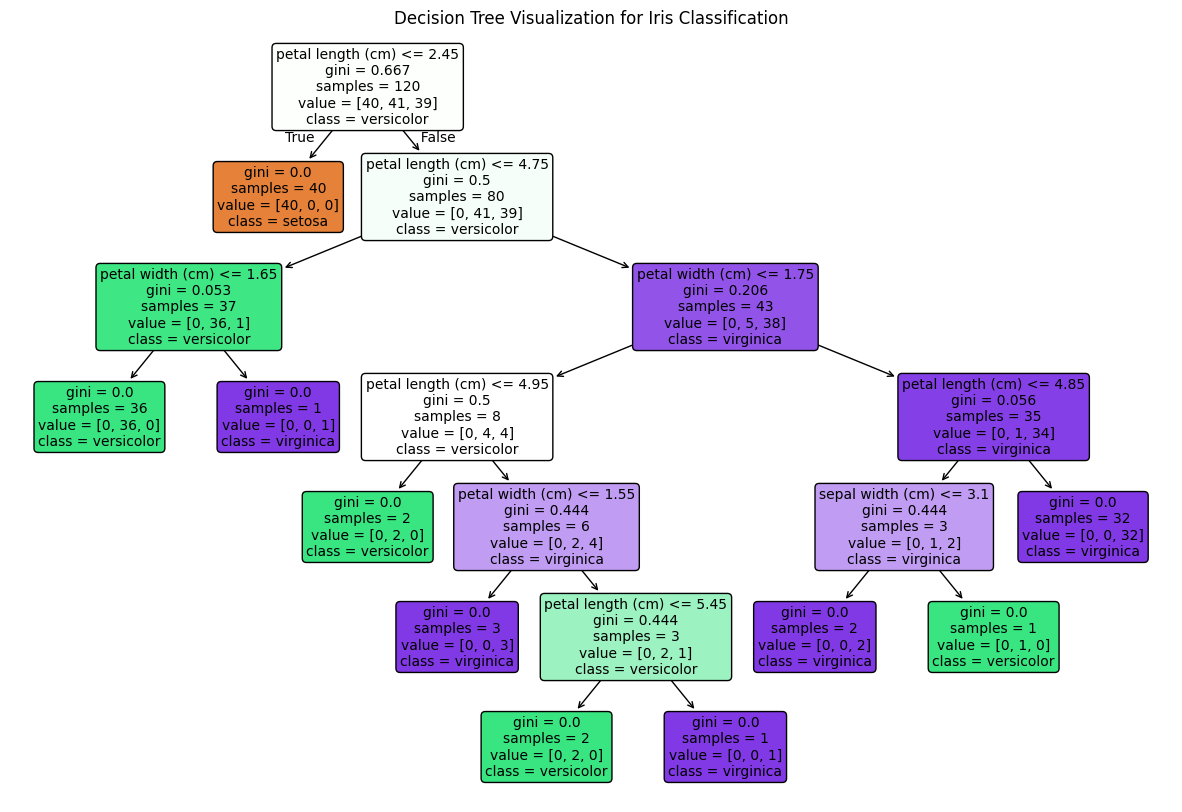

In [4]:
# Step 4: Visualize the Decision Tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(
    model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization for Iris Classification")
plt.show()
